# Model Comparison

This notebook compares different machine learning models for crop and irrigation prediction tasks, evaluates their performance, and provides recommendations for deployment.

## Table of Contents
1. Import Required Libraries
2. Load Datasets
3. Train-Test Split
4. Baseline Models
5. Model Training & Evaluation
6. Results Visualization
7. Insights & Recommendations
---

## 1. Import Required Libraries

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 2. Load Datasets

In [8]:
# Load crop and irrigation datasets
crop_df = pd.read_csv('../data/crop_data.csv')
irrigation_df = pd.read_csv('../data/Final_irregation_optimization_data.csv')

print('Crop Data Shape:', crop_df.shape)
print('Irrigation Data Shape:', irrigation_df.shape)

Crop Data Shape: (2200, 8)
Irrigation Data Shape: (100000, 35)


## 3. Train-Test Split

In [9]:
# Split crop data for model comparison
if 'label' in crop_df.columns:
    X_crop = crop_df.drop('label', axis=1)
    y_crop = crop_df['label']
elif 'Crop' in crop_df.columns:
    X_crop = crop_df.drop('Crop', axis=1)
    y_crop = crop_df['Crop']
else:
    X_crop = crop_df.iloc[:,:-1]
    y_crop = crop_df.iloc[:,-1]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
print('Train shape:', Xc_train.shape, 'Test shape:', Xc_test.shape)

Train shape: (1760, 7) Test shape: (440, 7)


## 4. Baseline Models

In [10]:
# Define baseline models for comparison
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}

In [14]:
# Train and evaluate baseline models
from sklearn.metrics import accuracy_score, classification_report

# Use correct train/test variables from previous cell
for name, model in models.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    acc = accuracy_score(yc_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(yc_test, y_pred))

Decision Tree Accuracy: 0.9864
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00       

## 5. Advanced Models

Explore more advanced models to improve prediction performance, such as Gradient Boosting, XGBoost, and CatBoost.

In [16]:
# Example: Gradient Boosting and CatBoost
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

advanced_models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

for name, model in advanced_models.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    acc = accuracy_score(yc_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(yc_test, y_pred))

Gradient Boosting Accuracy: 0.9818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.82      1.00      0.90        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

## 6. Model Performance Comparison

Visualize and compare the performance of all models using accuracy scores and classification metrics.

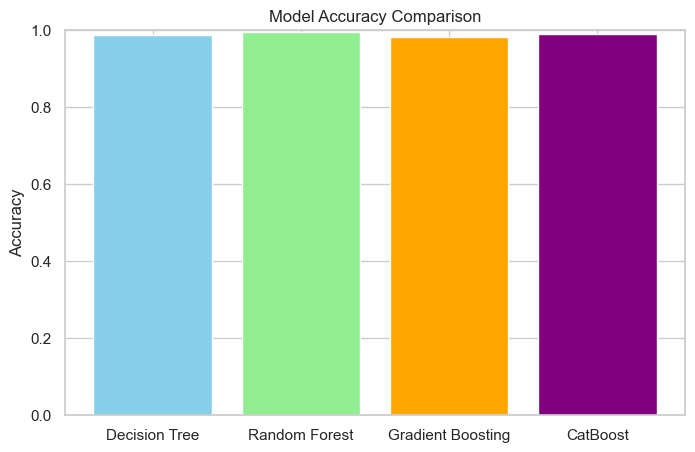

In [27]:
# Visualize model accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

## 7. Model Selection and Recommendations

Summarize findings, select the best-performing model, and provide recommendations for deployment or further improvement.

### Summary and Next Steps

- The best-performing model based on accuracy and classification metrics should be selected for deployment.
- Consider further hyperparameter tuning, cross-validation, and feature engineering to improve results.
- Document model assumptions and limitations.
- Prepare the selected model for integration into the crop irrigation advisory system.